In [1]:
import os
import cv2
import glob
import random
import warnings
import numpy as np
from PIL import Image
import seaborn as sns
sns.set(style="white")
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)
from numpy.linalg import matrix_power
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [2]:
n_images = 250
my_number = 7
images = []

while len(images) != n_images:
    idx = random.randint(7, 25000)
    image_name = f'im{idx}.jpg'
    image = cv2.imread(glob.glob(f'./mirflickr/{image_name}')[0])[:, :, 1]
    images.append(image)
    
images = np.asarray(images)
assert len(images) == n_images

# Провести декомпозицію каналу зеленого кольору тестових зображень з використанням методу головних компонент (PCA):

In [3]:
def pca_compres(image, components = None, inverse = True):
    pca = PCA(n_components=components, svd_solver='full')
    res = pca.fit_transform(image)
    if inverse:
        return pca.inverse_transform(res)
    return pca, res

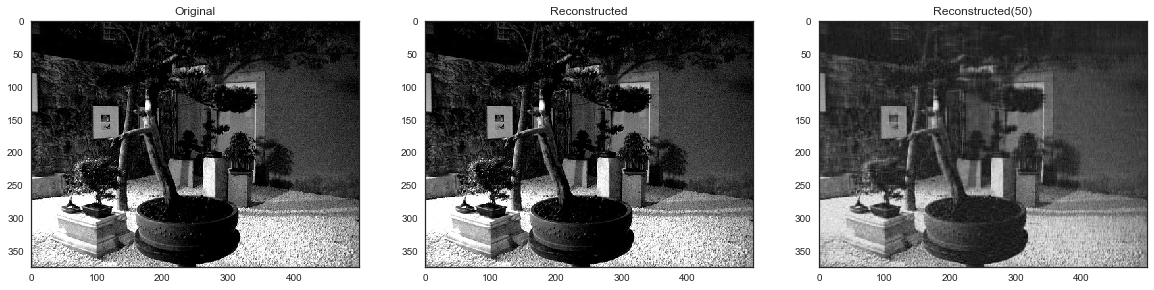

In [4]:
plt.figure(figsize=(20,20))
plt.subplot(131)
plt.title('Original')
plt.imshow(images[0], cmap='gray')

plt.subplot(132)
plt.title('Reconstructed')
plt.imshow(pca_compres(images[0]), cmap='gray')

plt.subplot(133)
plt.title('Reconstructed(50)')
plt.imshow(pca_compres(images[0], components=50), cmap='gray');

# Для каналу зеленого кольору тестових зображень обчислити наступні характеристики розподілу значень яскравості пікселів:

In [5]:
# Впорядкувати отримані компоненти вихідного зображення в порядку зменшення значень сингулярних чисел
pca, compressed = pca_compres(images[0], inverse = False)
pca.singular_values_

array([24286.67555376,  9264.05084724,  7009.38745324,  6020.23539443,
        4729.60189182,  4423.83450302,  3906.14303957,  3298.94836642,
        2893.47471029,  2563.64753868,  2513.1891323 ,  2389.02353435,
        2205.66447056,  2053.15194762,  2030.05180091,  1946.88865207,
        1855.72260826,  1656.07087115,  1587.58820633,  1545.98605065,
        1479.19381926,  1440.51157205,  1422.61983279,  1367.88649971,
        1310.67435813,  1301.61353563,  1252.30534303,  1248.61497338,
        1216.47528238,  1201.63107695,  1150.98387111,  1124.48609731,
        1110.87194729,  1108.27591805,  1085.70636093,  1060.21217302,
        1053.27586071,  1026.94925839,  1001.37486703,   984.24561068,
         973.78177911,   964.55098367,   942.46313483,   931.50228706,
         928.59106805,   919.33725445,   899.75184339,   883.60154733,
         875.31348264,   870.34141781,   863.97402333,   854.18817983,
         848.22355993,   838.68989582,   833.95202105,   822.50542268,
      

image shape:  (375, 500)
MSE 10% components 37:  279.48626942459003
MSE 20% components 75:  142.04878187039222
MSE 30% components 112:  79.72719863440666
MSE 40% components 150:  44.086464462687715
MSE 50% components 187:  24.188405804580942
MSE 60% components 225:  12.230326987318367
MSE 70% components 262:  5.673291810272381
MSE 80% components 300:  2.108505924250797
MSE 90% components 337:  0.5256532960077758
MSE 100% components 375:  2.105518929290236e-25


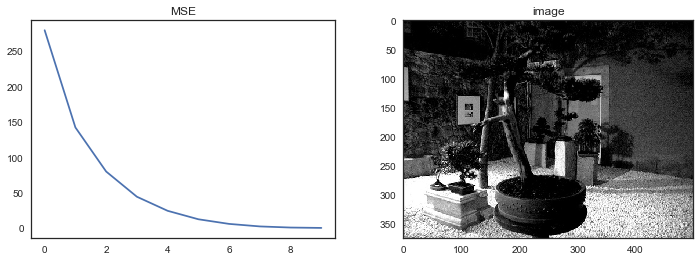

image shape:  (500, 333)
MSE 10% components 33:  388.9047930352149
MSE 20% components 66:  231.9979557968351
MSE 30% components 99:  145.84227040448894
MSE 40% components 133:  89.72897627874848
MSE 50% components 166:  53.92276664725554
MSE 60% components 199:  30.51839784690816
MSE 70% components 233:  15.281444828920344
MSE 80% components 266:  6.57041198617187
MSE 90% components 299:  1.8979032115923382
MSE 100% components 333:  6.230531051857379e-26


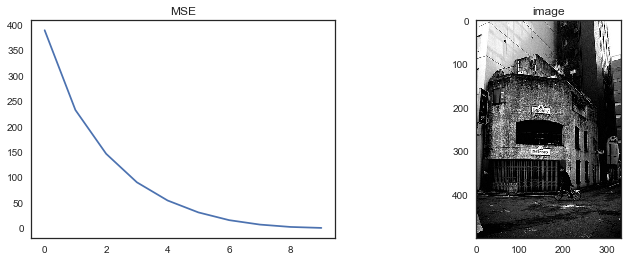

image shape:  (334, 500)
MSE 10% components 33:  23.49426025341977
MSE 20% components 66:  7.704828515312672
MSE 30% components 100:  2.945184671724519
MSE 40% components 133:  1.3008210932284279
MSE 50% components 167:  0.604352985970864
MSE 60% components 200:  0.2997420551396195
MSE 70% components 233:  0.13790783148736993
MSE 80% components 267:  0.05084550491039522
MSE 90% components 300:  0.012390747752847793
MSE 100% components 334:  5.802514513592089e-27


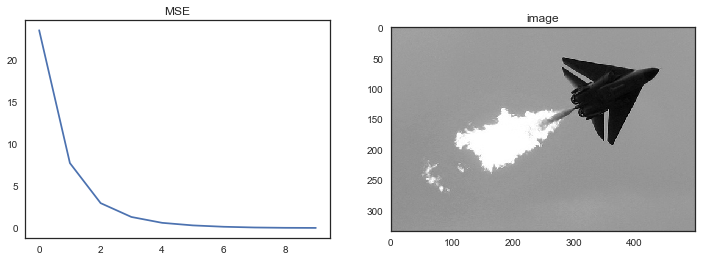

image shape:  (362, 500)
MSE 10% components 36:  90.98712061736477
MSE 20% components 72:  43.22536891962979
MSE 30% components 108:  23.13629027987578
MSE 40% components 144:  12.588503336503827
MSE 50% components 181:  6.512255832095792
MSE 60% components 217:  3.303812125741286
MSE 70% components 253:  1.5042573322963848
MSE 80% components 289:  0.5730078458590226
MSE 90% components 325:  0.13914142119467365
MSE 100% components 362:  5.734351096931603e-26


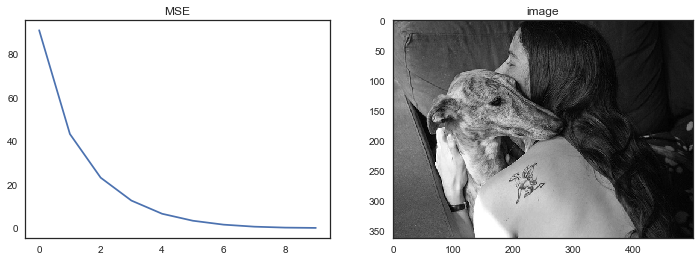

image shape:  (340, 500)
MSE 10% components 34:  163.87204690133277
MSE 20% components 68:  76.21263557724241
MSE 30% components 102:  38.039460459145744
MSE 40% components 136:  18.275016949380678
MSE 50% components 170:  7.996469528171299
MSE 60% components 204:  3.089186672700035
MSE 70% components 238:  0.9683732820070473
MSE 80% components 272:  0.219295799285074
MSE 90% components 306:  0.024071117990709646
MSE 100% components 340:  2.8488237443042894e-26


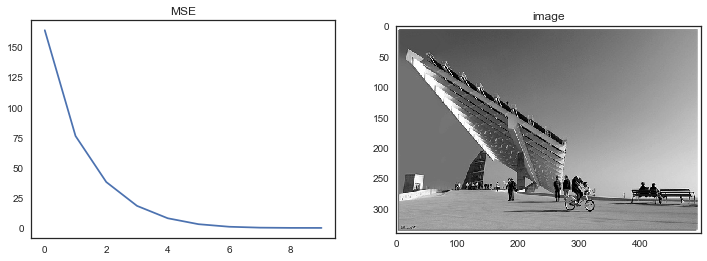

In [6]:
# Провести реконструкцію зображення при використанні лише частки (𝛼%)компонентів розкладу, що характеризуються відмінними від нуля сингулярними числами. 
for image in images[:5]:
    image_errors = list()
    print('image shape: ', image.shape)
    
    for i in range(1, 10 + 1):
        comp_n = int(min(image.shape[0], image.shape[1]) * i * 0.1)
        res = pca_compres(image, components = comp_n )
        error = mean_squared_error(image, res)
        image_errors.append(error)
        print(f'MSE {i*10}% components {comp_n}: ', error) 
        
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.title('MSE')
    plt.plot(image_errors)
    
    plt.subplot(122)
    plt.title('image')
    plt.imshow(image, cmap='gray')
    plt.show();

In [7]:
def total_mse(data):
    total_mse = np.zeros(10, )
    for image in data:
        
        sample_errors = list()
        
        for i in range(1, 10 + 1):
            comp_n = int(min(image.shape[0], image.shape[1]) * i * 0.1)
            res = pca_compres(image, components = comp_n )
            error = mean_squared_error(image, res)
            sample_errors.append(error)
            
        np.add(total_mse, np.array(sample_errors), out = total_mse)
    return total_mse / len(data)

247.51864030448795 123.59106025482122 67.60308615162863 36.89485046909294 19.635202109050493 9.820880267311255 4.427394405396665 1.6555269322187043 0.40872906997618524 5.247268492447827e-26


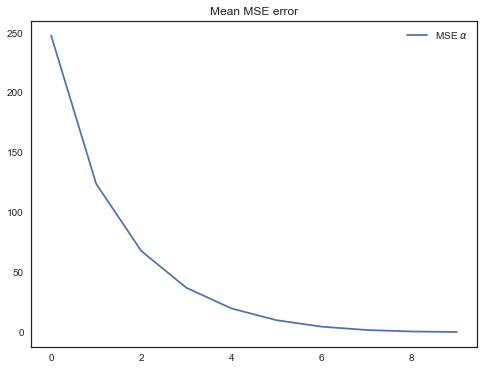

In [8]:
error = total_mse(images)
print(*error)
plt.figure(figsize=(8, 6))
plt.title('Mean MSE error')
plt.plot(error, label='MSE $\\alpha$')
plt.legend()
plt.show();

# Провести моделювання каналу зеленого кольору тестових зображень з використанням марківських ланцюгів першого порядку $𝑀_1$: 
### Отримати стохастичну матрицю для каналу зеленого кольору при обробці пікселів: 
 - По горизонталі, зліва направо
 - По горизонталі, справа наліво
 - По вертикалі, зверху вниз
 - По вертикалі, знизу вгору
 - По головній діагоналі, вниз
 - По головній діагоналі, вгору
 - По побічній діагоналі, вниз
 - По побічній діагоналі, вгору

(375, 500)


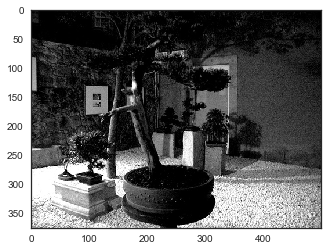

In [9]:
plt.imshow(images[0], cmap='gray') 
print(images[0].shape)

In [10]:
def normalize_matrix(matrix):
    row_sums = matrix.sum(axis = 1)
    res = matrix / row_sums[:, np.newaxis]
    return res

In [11]:
def image_iteration_left_right(image, matrix):
    h, w = image.shape
    for i in range(h):
        for j in range(w - 1):
            val_1 = image[i][j]
            val_2 = image[i][j + 1]
            matrix[val_2][val_1] += 1
    return matrix

In [12]:
def image_iteration_right_left(image, matrix):
    h, w = image.shape
    for i in range(h):
        for j in range(w - 1):
            val_1 = image[i][w - j - 2]
            val_2 = image[i][w - j - 1]
            matrix[val_1][val_2] += 1
    return matrix    

In [13]:
def image_iteration_top_down(image, matrix):
    h, w = image.shape
    for i in range(h - 1):
        for j in range(w):
            val_1 = image[i][j]
            val_2 = image[i + 1][j]
            matrix[val_2][val_1] += 1
    return matrix  

In [14]:
def image_iteration_down_up(image, matrix):
    h, w = image.shape
    for i in range(h - 1):
        for j in range(w):
            val_1 = image[h - i - 2][j]
            val_2 = image[h - i - 1][j]
            matrix[val_1][val_2] += 1
    return matrix  

In [15]:
def main_diagonal_top_down(image, matrix):
    h, w = image.shape
    for i in range(h - 1):
        for j in range(w - 1):
            val_1 = image[i][j]
            val_2 = image[i + 1][j + 1]
            matrix[val_2][val_1] += 1
    return matrix  

In [16]:
def main_diagonal_down_up(image, matrix):
    h, w = image.shape
    for i in range(h - 1):
        for j in range(w - 1):
            val_1 = image[h - i - 2][w - j - 2]
            val_2 = image[h - i - 1][w - j - 1]
            matrix[val_1][val_2] += 1
    return matrix  

In [17]:
def opposite_diagonal_top_down(image, matrix):
    h, w = image.shape
    for i in range(h - 1):
        for j in range(w - 1):
            val_1 = image[i][w - j - 1]
            val_2 = image[i + 1][w - j - 2]
            matrix[val_2][val_1] += 1
    return matrix  

In [18]:
def opposite_diagonal_down_up(image, matrix):
    h, w = image.shape
    for i in range(h - 1):
        for j in range(w - 1):
            val_1 = image[h - i - 1][j]
            val_2 = image[h - i - 2][j + 1]
            matrix[val_2][val_1] += 1
    return matrix  

In [19]:
def general_stochastic_matrix(data, hmm_type = 'h_left_right'):
    stochastic_matrix = np.zeros((256, 256))
    if hmm_type == 'h_left_right':
        for image in data:
            image_iteration_left_right(image, stochastic_matrix)
                
    if hmm_type == 'h_right_left':
        for image in data:
            image_iteration_right_left(image, stochastic_matrix)
                
    if hmm_type == 'v_top_down':
        for image in data:
            image_iteration_top_down(image, stochastic_matrix)
                
    if hmm_type == 'v_down_up':
        for image in data:
            image_iteration_down_up(image, stochastic_matrix)
                
    if hmm_type == 'dm_top_down':
        for image in data:
            main_diagonal_top_down(image, stochastic_matrix)
                
    if hmm_type == 'dm_down_up':
        for image in data:
            main_diagonal_down_up(image, stochastic_matrix)
                
    if hmm_type == 'ds_top_down':
        for image in data:
            opposite_diagonal_top_down(image, stochastic_matrix)
                
    if hmm_type == 'ds_down_up':
        for image in data:
            opposite_diagonal_down_up(image, stochastic_matrix)
            
    stochastic_matrix = normalize_matrix(stochastic_matrix)
    return stochastic_matrix

In [20]:
def regularity_check(matrix, k):
    new_matrix = matrix_power(matrix, k)
    return not ((new_matrix <= 0).sum() != 0)

In [21]:
def recurrence_check(matrix, k):
    new_matrix = matrix_power(matrix, k)
    for i in range(new_matrix.shape[0]):
        if new_matrix[~i, i] == 0:
            return False
        return True

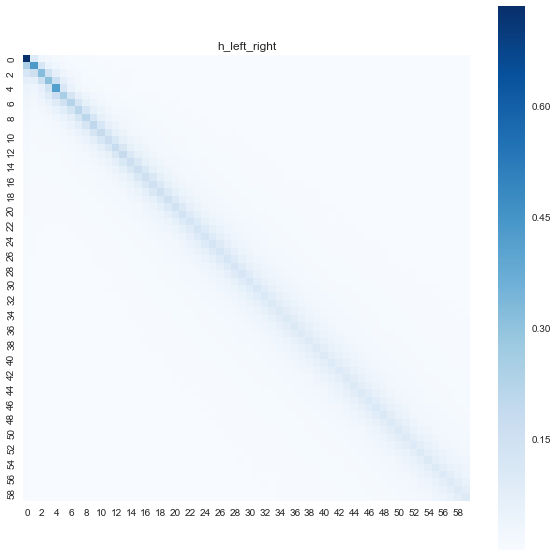

Matrix is regular:  True
Marix is recurrent:  True


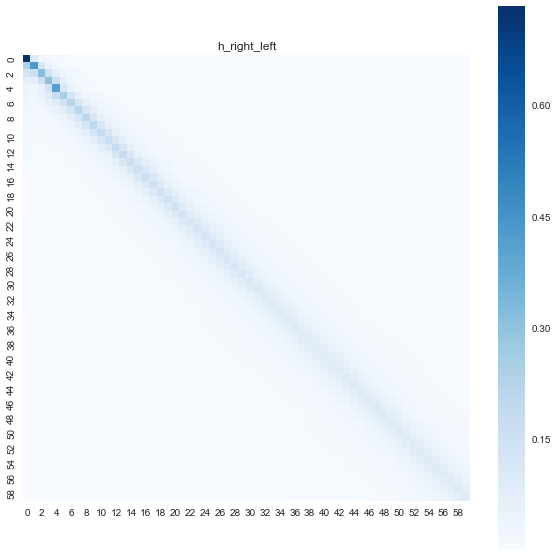

Matrix is regular:  True
Marix is recurrent:  True


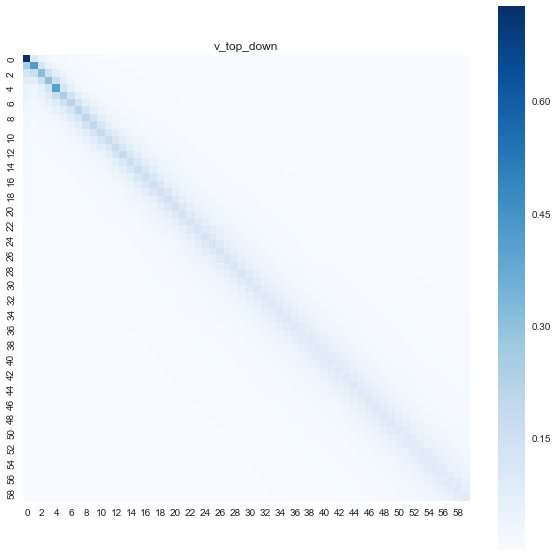

Matrix is regular:  True
Marix is recurrent:  True


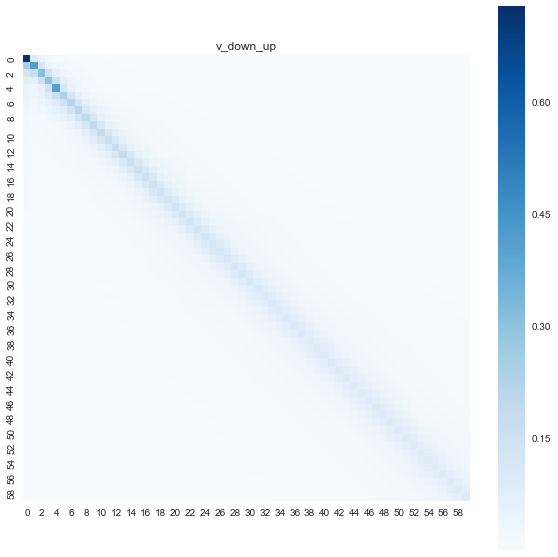

Matrix is regular:  True
Marix is recurrent:  True


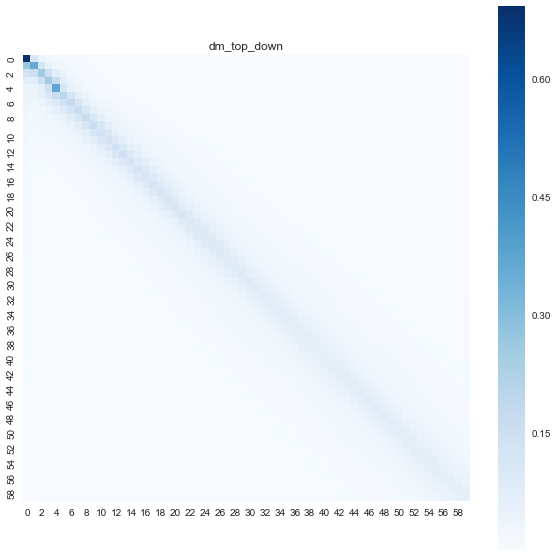

Matrix is regular:  True
Marix is recurrent:  True


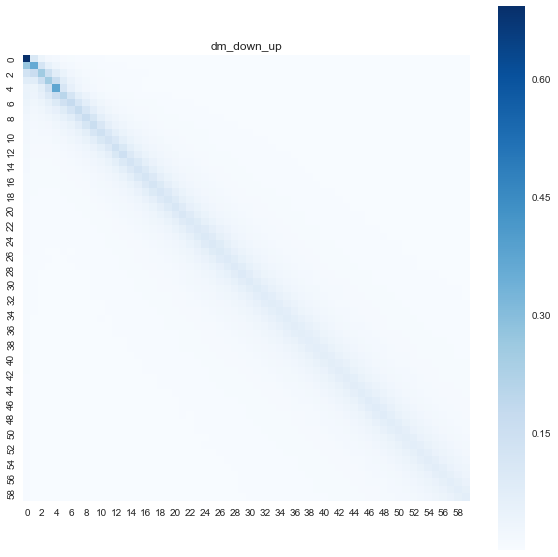

Matrix is regular:  True
Marix is recurrent:  True


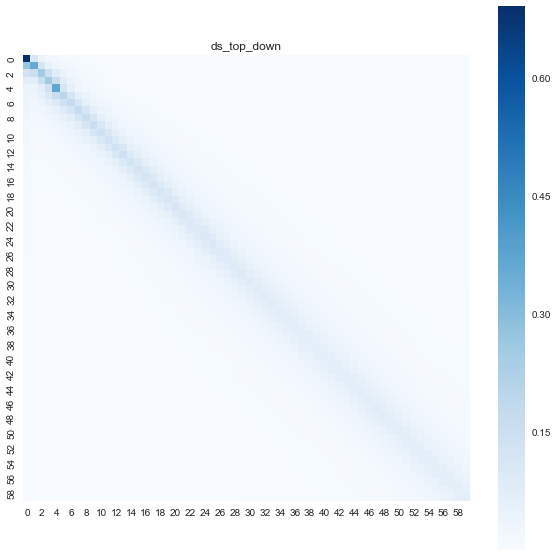

Matrix is regular:  True
Marix is recurrent:  True


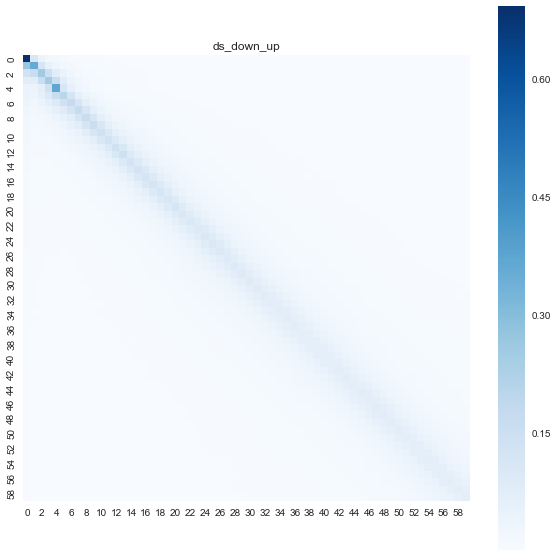

Matrix is regular:  True
Marix is recurrent:  True


In [22]:
hmm_types = ['h_left_right', 'h_right_left', 'v_top_down', 'v_down_up', 'dm_top_down', 'dm_down_up', 'ds_top_down', 'ds_down_up']

for i, type_ in enumerate(hmm_types):
    matrix = general_stochastic_matrix(images, hmm_type=type_)
    plt.figure(figsize=(10, 10))
    plt.title(type_)
    sns.heatmap(matrix[:6 * 10, :6 * 10], square=True, cmap='Blues')
    plt.show();
    
    regular = regularity_check(matrix, k = 5)
    print('Matrix is regular: ', regular)
    recurrent = recurrence_check(matrix, k = 5)
    print('Marix is recurrent: ', recurrent)